<a href="https://colab.research.google.com/github/shreyaspatil17/ML_assignments/blob/main/ML3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###K-Nearest Neighbors (KNN)
is a supervised learning algorithm used for classification and regression. It works by finding the
k closest training data points to a query point and determining the class or value based on majority voting (for classification) or averaging (for regression).

Steps in KNN:
1. Choose the number of neighbors k.
2. Calculate the distance (e.g., Euclidean distance) between the query point and all training points.
3. Select the k nearest neighbors.
4. Assign the most common class among the k neighbors to the query point.


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
data = {
    'S1': [2, 4, 4, 4, 6, 6],
    'S2': [4, 6, 4, 2, 4, 2],
    'Test Class': ['Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive']
}
df = pd.DataFrame(data)


In [3]:
df.head()

,S1,S2,Test Class
0,2,4,Negative
1,4,6,Negative
2,4,4,Positive
3,4,2,Negative
4,6,4,Negative


In [4]:
class_mapping = {'Negative': 0, 'Positive': 1}
df['Test Class'] = df['Test Class'].map(class_mapping)


In [16]:
X = df[['S1', 'S2']]
y = df['Test Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##How to Find the Optimal Value of k?
Choosing an optimal k is crucial for balancing bias and variance in the model. Common methods to determine k include:
1. Elbow Method: Plot the error rate for different values of k and select the
point where the error stabilizes.
2. Cross-Validation: Use cross-validation to test different k values and choose the one with the best performance.
3. Domain Knowledge: Sometimes, domain expertise helps in selecting an appropriate k.
4. A small k (e.g., 1-3) may result in high variance (overfitting), while a large k smoothens the decision boundary but may introduce bias.



In [18]:
# Find optimal K using the elbow method
error_rates = []

k_values = range(1, min(11, len(X_train) + 1))
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_k = knn.predict(X_test)
    error_rates.append(np.mean(pred_k != y_test))

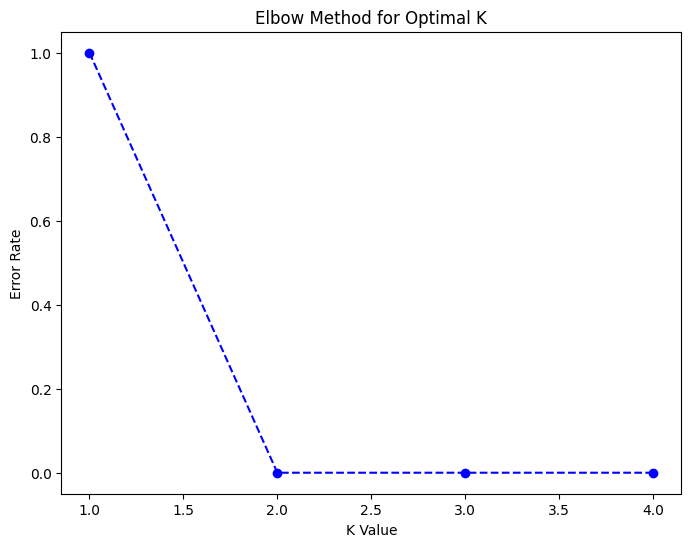

In [19]:
plt.figure(figsize=(8, 6))
plt.plot(k_values, error_rates, marker='o', linestyle='dashed', color='blue')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.title('Elbow Method for Optimal K')
plt.show()


In [20]:
optimal_k = k_values[np.argmin(error_rates)]
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


##Performance Metrics for Evaluating a Classifier:
To evaluate the performance of a KNN classifier, we use various metrics:
1. Precision: Measures how many of the predicted positives are actually positive.
2. Recall (Sensitivity): Measures how many actual positives were correctly predicted.
3. F1 Score: Harmonic mean of precision and recall, useful for imbalanced datasets.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


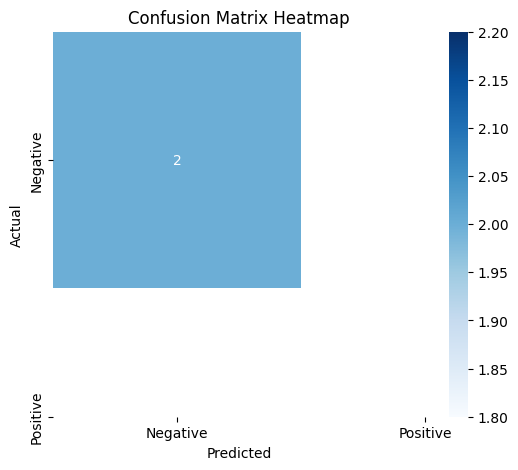

In [21]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [22]:
query_point = np.array([[6, 6]])
pred_class = knn.predict(query_point)
print("Predicted class using optimal k-NN:", 'Positive' if pred_class[0] == 1 else 'Negative')


Predicted class using optimal k-NN: Negative


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


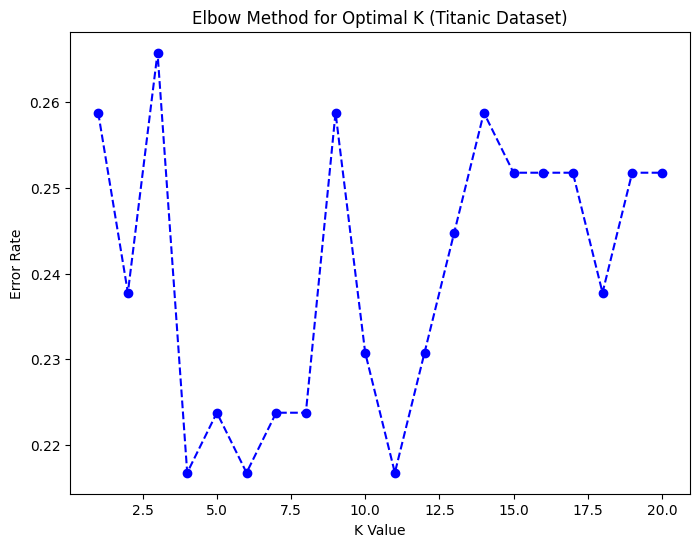

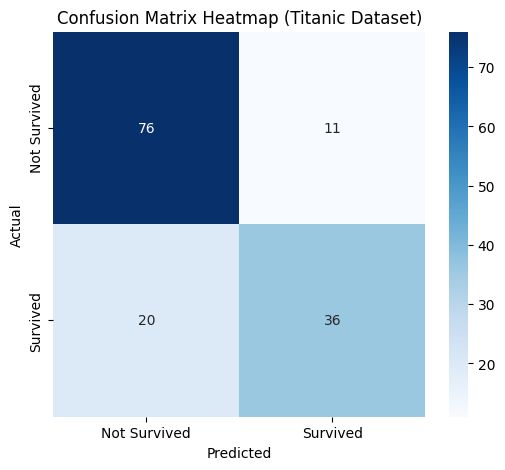

Predicted accuracy: 0.7832167832167832


In [26]:
df = sns.load_dataset('titanic')

df = df[['survived', 'pclass', 'sex', 'age', 'fare']].dropna() # select relevent columns only

label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])

# training and test data
X = df[['pclass', 'sex', 'age', 'fare']]
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Finding optimal K
error_rates = []
k_values = range(1, 21)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_k = knn.predict(X_test)
    error_rates.append(np.mean(pred_k != y_test))

plt.figure(figsize=(8, 6))
plt.plot(k_values, error_rates, marker='o', linestyle='dashed', color='blue')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.title('Elbow Method for Optimal K (Titanic Dataset)')
plt.show()

# Train the optimal KNN model
optimal_k = k_values[np.argmin(error_rates)]
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Confusion Matrix and Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap (Titanic Dataset)')
plt.show()

print("Predicted accuracy:", accuracy_score(y_test, y_pred))


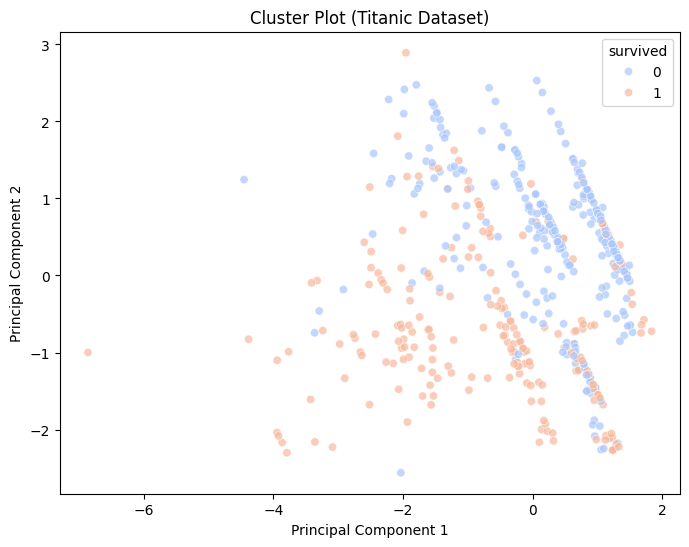

In [27]:
from sklearn.decomposition import PCA
# Cluster Plot using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_train, palette='coolwarm', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Cluster Plot (Titanic Dataset)')
plt.show()
